In [1]:
# -*- coding: utf-8 -*-
import os 
import numpy as np
import matplotlib.pyplot as plt
import glob
from tkinter import filedialog as fd
import time
import datetime
from scipy.signal import find_peaks
import math 
from sklearn.linear_model import LinearRegression

###############################################################################
########## Code Body ##########################################################
###############################################################################
    
    
workingPath = fd.askdirectory()
os.chdir(workingPath)

if os.path.isfile("SynthesisFile.txt"):
    os.remove("SynthesisFile.txt")
    
for fileName in sorted(glob.glob("*.IP")):
    st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')  
                 
    #Read the CSV that contains all the data
    currentFile = open(fileName,'r')
    fileLines = currentFile.readlines() 
    fileNameOut = fileName.rstrip(".txt")
    currentFile.close()
    print(st)
    print("Processing: " + fileNameOut)
        
    Field = np.array([])
    hallVolt = np.array([])
    gate_voltage = np.array([])
    theta_M = np.array([])
    sin_theta = np.array([])
    cos_theta = np.array([])
    channel_voltage = np.array([])
    voltage_Counter = 1
    fit = np.array([])
    v_hall = np.array([])

    for lineIndex in range(len(fileLines)):
        currentLine = fileLines[lineIndex]
        dataSegment = currentLine.split()
        Field = np.append(Field, float(dataSegment[9])) #This is milli Tesla
        hallVolt = np.append(hallVolt, float(dataSegment[5])) #This is milli Volt
        channel_voltage = np.append(channel_voltage, float(dataSegment[2])) #This is Volt
        VG = float(dataSegment[6]) - float(dataSegment[2])/2
        gate_voltage = np.append(gate_voltage, np.round(VG, 2)) #This is Volt
        if lineIndex > 1 and VG != gate_voltage[lineIndex-1]:
            voltage_Counter = voltage_Counter + 1
    HV = hallVolt-((max(hallVolt))+min(hallVolt))/2
    array = np.column_stack([Field, HV, gate_voltage])
    array
    hv_new = []
    Fld_new = []
    
    for Fld,hv,gv in array:
        if gv == 0: # change specific gate_voltage value
            hv_new.append(hv)
            Fld_new.append(Fld)
    hv_nw = np.array(hv_new)
    Field_new = np.array(Fld_new)
    HVN = hv_nw/((max(hv_nw)-min(hv_nw))/2)
#    array1 = np.column_stack([Field_new, HVN])

    for index in range(len(HVN)):
        if HVN[index] < 0:
            try:
                theta_M = np.append(theta_M, math.acos(HVN[index])-np.pi)
            except:
                ValueError
            else:
                theta_M = np.append(theta_M, math.acos(HVN[index]))

    for angle in range(len(theta_M)):
        sin_theta = np.append(sin_theta, math.sin(theta_M[angle]))
        cos_theta = np.append(cos_theta, math.cos(theta_M[angle]))

#     #From here on issues in code
    part2 = ((math.cos(86*np.pi/180)/cos_theta) - (math.sin(86*np.pi/180)/sin_theta))
    x = sin_theta ** 2
    RHS = abs(Field_new * part2[:1602])
    xFit = np.array([])
    RHSFit = np.array([])

    for index in range(len(x)):
        if x[index] > 0.2 and x[index] < 0.7:
            xFit = np.append(xFit, x[index])
            RHSFit = np.append(RHSFit, RHS[index])

    model = LinearRegression().fit(xFit.reshape(-1,1), RHSFit)
    regression_line = xFit*model.coef_ + model.intercept_

    m = (((np.mean(xFit) * np.mean(RHSFit)) - np.mean(xFit*RHSFit)) / (np.mean(xFit)**2 -np.mean(xFit*RHSFit)))
    b = np.mean(RHSFit) - m*np.mean(xFit)
    regression_line = xFit*m + b
    plt.figure(1)
    plt.scatter(xFit, RHSFit, c = 'green')
    plt.plot(xFit, regression_line, c = 'r')
    figureName = '04. RHS vs LHS.png'
    plt.title("||µ0_H|| (cos\u03B8_H/cos\u03B8_M - sin\u03B8_H/sin\u03B8_M vs. sin²\u03B8M")
    plt.xlabel("sin²\u03B8M [arb. unit]")
    plt.ylabel("||\u03BC H|| (cos\u03B8_H/cos\u03B8_M - sin\u03B8_H/sin\u03B8_M [mT]")
    plt.savefig(os.path.join(workingPath, figureName), dpi = 200, format = 'png')
    plt.legend(['gate voltage = 0']) # change gate voltage value
    plt.show()
    plt.close(1)


2020-04-04 18:42:00
Processing: AHE_3V_IP_RawData.ip


<Figure size 640x480 with 1 Axes>

In [7]:
np.savetxt('test.txt', array, delimiter=' ')

In [3]:
Field_new.shape

(1602,)

In [5]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import glob
from tkinter import filedialog as fd
import time
import datetime
import math 
from sklearn.linear_model import LinearRegression

###############################################################################
######################## Input Generator ######################################
###############################################################################
    
    
workingPath = fd.askdirectory()
os.chdir(workingPath)

if os.path.isfile("SynthesisFile.txt"):
    os.remove("SynthesisFile.txt")
    
for fileName in sorted(glob.glob("*.IP")):
    st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')  
                 
    #Read the CSV that contains all the data
    currentFile = open(fileName,'r')
    fileLines = currentFile.readlines() 
    fileNameOut = fileName.rstrip(".output")
    currentFile.close()
    print(st)
    print("Processing: " + fileNameOut)
        
    field = np.array([])
    hall_voltage = np.array([])
    gate_voltage = np.array([])
    channel_voltage = np.array([])
    voltage_Counter = 0
    v_hall = np.array([])
    VGate = np.array([])

    for lineIndex in range(len(fileLines)):
        currentLine = fileLines[lineIndex]
        dataSegment = currentLine.split()
        field = np.append(field, float(dataSegment[9])) #This is milli Tesla
        hall_voltage = np.append(hall_voltage, float(dataSegment[5])) #This is milli Volt
        channel_voltage = np.append(channel_voltage, float(dataSegment[2])) #This is Volt
        VG = float(dataSegment[6]) - float(dataSegment[2])/2
        gate_voltage = np.append(gate_voltage, np.round(VG, 2)) #This is Volt

    hall_volt_shifted = hall_voltage-((max(hall_voltage))+min(hall_voltage))/2
 
    dataFile = fileNameOut + ".output"
    with open(os.path.join(workingPath, dataFile),'w') as temp_file:
        for index in range(len(gate_voltage)):
            temp_file.write(str(field[index]) + '\t' + str(hall_volt_shifted[index]) +  '\t' + str(gate_voltage[index]) + '\n')

###############################################################################
########################### Analysis ##########################################
###############################################################################


workingPath = fd.askdirectory()
os.chdir(workingPath)

if os.path.isfile("SynthesisFile.txt"):
    os.remove("SynthesisFile.txt")
    
for fileName in sorted(glob.glob("*.output")):
    st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')  
                 
    #Read the CSV that contains all the data
    currentFile = open(fileName,'r')
    fileLines = currentFile.readlines() 
    fileNameOut = fileName.rstrip(".txt")
    currentFile.close()
    print(st)
    print("Processing: " + fileNameOut)
        
    field = np.array([])
    hall_voltage = np.array([])
    gate_voltage = np.array([])
    channel_voltage = np.array([])
    voltage_Counter = 0
    v_hall = np.array([])
    VGate = np.array([])
    VHall_matrix = np.array([])
    a = np.array([])
    iteration = np.array([])

    for lineIndex in range(len(fileLines)):
        currentLine = fileLines[lineIndex]
        dataSegment = currentLine.split()
        field = np.append(field, float(dataSegment[0])) #This is milli Tesla
        hall_voltage = np.append(hall_voltage, float(dataSegment[1])) #This is milli Volt
        VG = float(dataSegment[2])
        gate_voltage = np.append(gate_voltage, np.round(VG, 2)) #This is Volt
        
        if lineIndex > 1 and VG != gate_voltage[lineIndex-1]:
            voltage_Counter = voltage_Counter + 1   #vounting every datapoint for gate_voltage
            #print(voltage_Counter)     
            for i in range(len(gate_voltage)):
                #print(i)       Is it doing what it is supposed to do? If not how the output should be? In my Opinion it is.
                for iteration in range(voltage_Counter):
                    #print(iteration)       #Is it doing what it is supposed to do? If not how the output should be? In my Opinion it is.
                    VGate = str(gate_voltage).split(str(iteration))

       # for j in range(len(hall_voltage)):
       # got stuck here
        #VHall = str(hall_voltage).split(str(VGate))
        #a = np.ndarray(str(VHall)) 
        a = np.full(iteration, hall_voltage) # or should it be np.full(VGate, hall_voltage)?
        #print(type(VHall))
        #VHall_matrix = np.zeros(str(VGate), str(VHall))
        #Field_intermediate = str(field).split(str(VGate))
        b = np.full(iteration, field) # or should it be np.full(VGate, field)?
        #field_matrix = np.zeros(str(VGate), str(field))
        #print(type(Field_intermediate))
        #b = np.ndarray(str(Field_intermediate))

        # getting this error with np.full: ValueError: could not broadcast input array from shape (2) into shape ()

        '''with open("test1.txt",'a') as temp_file:
                temp_file.write("-------------------------------------------------------\n")
                temp_file.write(st + "\n")
                temp_file.write('Voltage Counter: ' + str(voltage_Counter) + '\n')
            with open("test2.txt",'a') as temp_file:
                temp_file.write(st + "\n")
                temp_file.write('i: ' + str(i) + '\n')
                temp_file.write("-------------------------------------------------------\n")
            with open("test3.txt",'a') as temp_file:
                temp_file.write(st + "\n")
                temp_file.write('iteration: ' + str(iteration) + '\n')
                temp_file.write("-------------------------------------------------------\n")
            with open("test4.txt",'a') as temp_file:
                temp_file.write(st + "\n")
                temp_file.write('VGate: ' + str(VGate) + '\n')
                temp_file.write("-------------------------------------------------------\n")
            with open("test5.txt",'a') as temp_file:
                temp_file.write(st + "\n")
                temp_file.write('Hall Voltage Matrix: ' + str(VHall_matrix) + '\n')
                temp_file.write("-------------------------------------------------------\n")
            with open("test6.txt",'a') as temp_file:
                temp_file.write(st + "\n")
                temp_file.write('Field: ' + str(field_matrix) + '\n')
                temp_file.write("-------------------------------------------------------\n")'''
        #a = (max(VHall_matrix) + min(VHall_matrix))  /  2
        #hall_volt_shifted = hall_voltage- a
        #hall_volt_norm = hall_volt_shifted/((max(hall_volt_shifted)-min(hall_volt_shifted))/2)

    plt.figure()
    #plt.plot(Field_intermediate, VHall) ::: really weird output
    plt.plot(b, a)
    #plt.plot(Field, HV, label= "VG = " + str(VGate))
    #figureName = '01. hall voltage.png'
    plt.title("hall voltage vs. Field")
    plt.legend()
    plt.xlabel("Field [mT]")
    plt.ylabel("HallVolt [mV]")
    #plt.savefig(os.path.join(workingPath, figureName), dpi = 200, format = 'png')
    plt.show()
    plt.close()

2020-04-04 19:01:25
Processing: AHE_3V_IP_RawData.i
2020-04-04 19:01:28
Processing: AHE_3V_IP_RawData.i.outpu


ValueError: could not broadcast input array from shape (2) into shape ()

2020-04-01 06:21:47
Processing: AHE_3V_IP_RawData.ip


C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide


-3.0


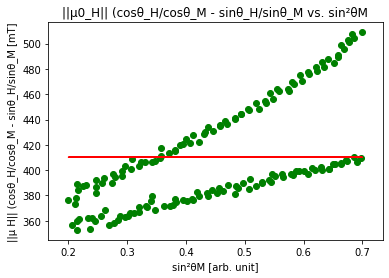

-1.5


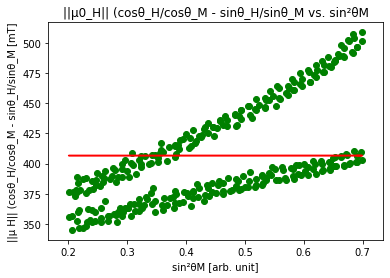

-0.0


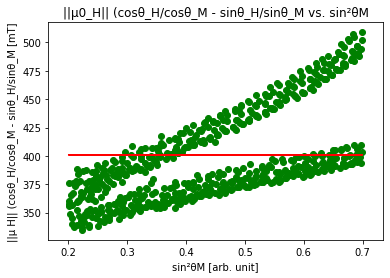

1.5


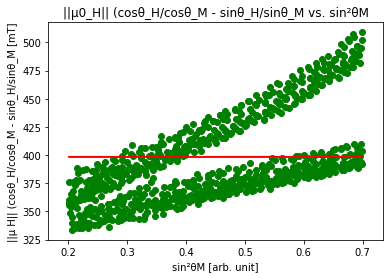

3.0


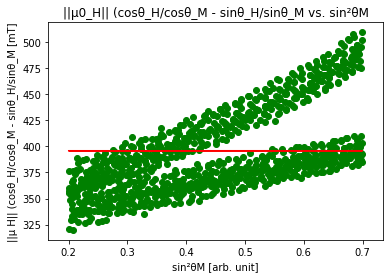

In [2]:
# -*- coding: utf-8 -*-
import os 
import numpy as np
import matplotlib.pyplot as plt
import glob
from tkinter import filedialog as fd
import time
import datetime
from scipy.signal import find_peaks
import math 
from sklearn.linear_model import LinearRegression

###############################################################################
########## Code Body ##########################################################
###############################################################################
    
    
workingPath = fd.askdirectory()
os.chdir(workingPath)

if os.path.isfile("SynthesisFile.txt"):
    os.remove("SynthesisFile.txt")
    
for fileName in sorted(glob.glob("*.IP")):
    st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')  
                 
    #Read the CSV that contains all the data
    currentFile = open(fileName,'r')
    fileLines = currentFile.readlines() 
    fileNameOut = fileName.rstrip(".txt")
    currentFile.close()
    print(st)
    print("Processing: " + fileNameOut)
        
    Field = np.array([])
    hallVolt = np.array([])
    gate_voltage = np.array([])
    theta_M = np.array([])
    sin_theta = np.array([])
    cos_theta = np.array([])
    channel_voltage = np.array([])
    voltage_Counter = 1
    fit = np.array([])
    v_hall = np.array([])

    for lineIndex in range(len(fileLines)):
        currentLine = fileLines[lineIndex]
        dataSegment = currentLine.split()
        Field = np.append(Field, float(dataSegment[9])) #This is milli Tesla
        hallVolt = np.append(hallVolt, float(dataSegment[5])) #This is milli Volt
        channel_voltage = np.append(channel_voltage, float(dataSegment[2])) #This is Volt
        VG = float(dataSegment[6]) - float(dataSegment[2])/2
        gate_voltage = np.append(gate_voltage, np.round(VG, 2)) #This is Volt
        if lineIndex > 1 and VG != gate_voltage[lineIndex-1]:
            voltage_Counter = voltage_Counter + 1
    HV = hallVolt-((max(hallVolt))+min(hallVolt))/2
    array = np.column_stack([Field, HV, gate_voltage])
    hv_new = []
    Fld_new = []
    
    for Fld,hv,gv in array:
        if gv == 1.5: # change specific gate_voltage value
            hv_new.append(hv)
            Fld_new.append(Fld)
    hv_nw = np.array(hv_new)
    Field_new = np.array(Fld_new)
    HVN = hv_nw/((max(hv_nw)-min(hv_nw))/2)
#    array1 = np.column_stack([Field_new, HVN])

    for index in range(len(HVN)):
        if HVN[index] < 0:
            try:
                theta_M = np.append(theta_M, math.acos(HVN[index])-np.pi)
            except:
                ValueError
            else:
                theta_M = np.append(theta_M, math.acos(HVN[index]))

    for angle in range(len(theta_M)):
        sin_theta = np.append(sin_theta, math.sin(theta_M[angle]))
        cos_theta = np.append(cos_theta, math.cos(theta_M[angle]))

#     #From here on issues in code
    part2 = ((math.cos(86*np.pi/180)/cos_theta) - (math.sin(86*np.pi/180)/sin_theta))
    x = sin_theta ** 2
    RHS = abs(Field_new[:800] * part2)
    xFit = np.array([])
    RHSFit = np.array([])

    for index in range(len(x)):
        if x[index] > 0.2 and x[index] < 0.7:
            xFit = np.append(xFit, x[index])
            RHSFit = np.append(RHSFit, RHS[index])

    model = LinearRegression().fit(xFit.reshape(-1,1), RHSFit)
    regression_line = xFit*model.coef_ + model.intercept_

    m = (((np.mean(xFit) * np.mean(RHSFit)) - np.mean(xFit*RHSFit)) / (np.mean(xFit)**2 -np.mean(xFit*RHSFit)))
    b = np.mean(RHSFit) - m*np.mean(xFit)
    regression_line = xFit*m + b
    plt.figure(1)
    plt.scatter(xFit, RHSFit, c = 'green')
    plt.plot(xFit, regression_line, c = 'r')
    figureName = '04. RHS vs LHS.png'
    plt.title("||µ0_H|| (cos\u03B8_H/cos\u03B8_M - sin\u03B8_H/sin\u03B8_M vs. sin²\u03B8M")
    plt.xlabel("sin²\u03B8M [arb. unit]")
    plt.ylabel("||\u03BC H|| (cos\u03B8_H/cos\u03B8_M - sin\u03B8_H/sin\u03B8_M [mT]")
    plt.savefig(os.path.join(workingPath, figureName), dpi = 200, format = 'png')
    plt.legend(['gate voltage = 1.5']) # change gate voltage value
    plt.show()
    plt.close(1)


2020-04-01 01:21:52
Processing: AHE_3V_IP_RawData.ip


C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in true_divide


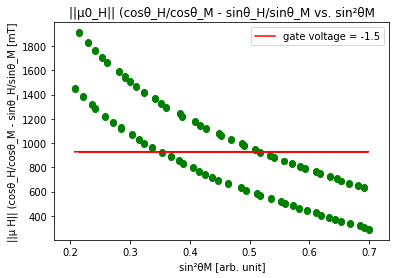

In [178]:
# -*- coding: utf-8 -*-
import os 
import numpy as np
import matplotlib.pyplot as plt
import glob
from tkinter import filedialog as fd
import time
import datetime
from scipy.signal import find_peaks
import math 
from sklearn.linear_model import LinearRegression

###############################################################################
########## Code Body ##########################################################
###############################################################################
    
    
workingPath = fd.askdirectory()
os.chdir(workingPath)

if os.path.isfile("SynthesisFile.txt"):
    os.remove("SynthesisFile.txt")
    
for fileName in sorted(glob.glob("*.IP")):
    st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')  
                 
    #Read the CSV that contains all the data
    currentFile = open(fileName,'r')
    fileLines = currentFile.readlines() 
    fileNameOut = fileName.rstrip(".txt")
    currentFile.close()
    print(st)
    print("Processing: " + fileNameOut)
        
    Field = np.array([])
    hallVolt = np.array([])
    gate_voltage = np.array([])
    theta_M = np.array([])
    sin_theta = np.array([])
    cos_theta = np.array([])
    channel_voltage = np.array([])
    voltage_Counter = 1
    fit = np.array([])
    v_hall = np.array([])

    for lineIndex in range(len(fileLines)):
        currentLine = fileLines[lineIndex]
        dataSegment = currentLine.split()
        Field = np.append(Field, float(dataSegment[9])) #This is milli Tesla
        hallVolt = np.append(hallVolt, float(dataSegment[5])) #This is milli Volt
        channel_voltage = np.append(channel_voltage, float(dataSegment[2])) #This is Volt
        VG = float(dataSegment[6]) - float(dataSegment[2])/2
        gate_voltage = np.append(gate_voltage, np.round(VG, 2)) #This is Volt
        if lineIndex > 1 and VG != gate_voltage[lineIndex-1]:
            voltage_Counter = voltage_Counter + 1
    HV = hallVolt-((max(hallVolt))+min(hallVolt))/2
    array = np.column_stack([Field, HV, gate_voltage])
    hv_new = []
    Fld_new = []
    
    for Fld,hv,gv in array:
        if gv == -1.5: # change specific gate_voltage value
            hv_new.append(hv)
            Fld_new.append(Fld)
    hv_nw = np.array(hv_new)
    Field_new = np.array(Fld_new)
    HVN = hv_nw/((max(hv_nw)-min(hv_nw))/2)
#    array1 = np.column_stack([Field_new, HVN])

    for index in range(len(HVN)):
        if HVN[index] < 0:
            try:
                theta_M = np.append(theta_M, math.acos(HVN[index])-np.pi)
            except:
                ValueError
            else:
                theta_M = np.append(theta_M, math.acos(HVN[index]))

    for angle in range(len(theta_M)):
        sin_theta = np.append(sin_theta, math.sin(theta_M[angle]))
        cos_theta = np.append(cos_theta, math.cos(theta_M[angle]))

#     #From here on issues in code
    part2 = ((math.cos(86*np.pi/180)/cos_theta) - (math.sin(86*np.pi/180)/sin_theta))
    x = sin_theta ** 2
    RHS = abs(Field_new * part2[:801])
    xFit = np.array([])
    RHSFit = np.array([])

    for index in range(len(x)):
        if x[index] > 0.2 and x[index] < 0.7:
            xFit = np.append(xFit, x[index])
            RHSFit = np.append(RHSFit, RHS[index])

    model = LinearRegression().fit(xFit.reshape(-1,1), RHSFit)
    regression_line = xFit*model.coef_ + model.intercept_

    m = (((np.mean(xFit) * np.mean(RHSFit)) - np.mean(xFit*RHSFit)) / (np.mean(xFit)**2 -np.mean(xFit*RHSFit)))
    b = np.mean(RHSFit) - m*np.mean(xFit)
    regression_line = xFit*m + b
    plt.figure(1)
    plt.scatter(xFit, RHSFit, c = 'green')
    plt.plot(xFit, regression_line, c = 'r')
    figureName = '04. RHS vs LHS.png'
    plt.title("||µ0_H|| (cos\u03B8_H/cos\u03B8_M - sin\u03B8_H/sin\u03B8_M vs. sin²\u03B8M")
    plt.xlabel("sin²\u03B8M [arb. unit]")
    plt.ylabel("||\u03BC H|| (cos\u03B8_H/cos\u03B8_M - sin\u03B8_H/sin\u03B8_M [mT]")
    plt.savefig(os.path.join(workingPath, figureName), dpi = 200, format = 'png')
    plt.legend(['gate voltage = -1.5']) # change gate voltage value
    plt.show()
    plt.close(1)


2020-04-01 01:22:36
Processing: AHE_3V_IP_RawData.ip


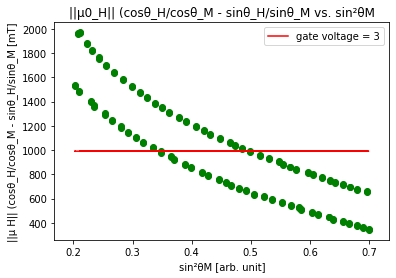

In [180]:
# -*- coding: utf-8 -*-
import os 
import numpy as np
import matplotlib.pyplot as plt
import glob
from tkinter import filedialog as fd
import time
import datetime
from scipy.signal import find_peaks
import math 
from sklearn.linear_model import LinearRegression

###############################################################################
########## Code Body ##########################################################
###############################################################################
    
    
workingPath = fd.askdirectory()
os.chdir(workingPath)

if os.path.isfile("SynthesisFile.txt"):
    os.remove("SynthesisFile.txt")
    
for fileName in sorted(glob.glob("*.IP")):
    st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')  
                 
    #Read the CSV that contains all the data
    currentFile = open(fileName,'r')
    fileLines = currentFile.readlines() 
    fileNameOut = fileName.rstrip(".txt")
    currentFile.close()
    print(st)
    print("Processing: " + fileNameOut)
        
    Field = np.array([])
    hallVolt = np.array([])
    gate_voltage = np.array([])
    theta_M = np.array([])
    sin_theta = np.array([])
    cos_theta = np.array([])
    channel_voltage = np.array([])
    voltage_Counter = 1
    fit = np.array([])
    v_hall = np.array([])

    for lineIndex in range(len(fileLines)):
        currentLine = fileLines[lineIndex]
        dataSegment = currentLine.split()
        Field = np.append(Field, float(dataSegment[9])) #This is milli Tesla
        hallVolt = np.append(hallVolt, float(dataSegment[5])) #This is milli Volt
        channel_voltage = np.append(channel_voltage, float(dataSegment[2])) #This is Volt
        VG = float(dataSegment[6]) - float(dataSegment[2])/2
        gate_voltage = np.append(gate_voltage, np.round(VG, 2)) #This is Volt
        if lineIndex > 1 and VG != gate_voltage[lineIndex-1]:
            voltage_Counter = voltage_Counter + 1
    HV = hallVolt-((max(hallVolt))+min(hallVolt))/2
    array = np.column_stack([Field, HV, gate_voltage])
    hv_new = []
    Fld_new = []
    
    for Fld,hv,gv in array:
        if gv == 3: # change specific gate_voltage value
            hv_new.append(hv)
            Fld_new.append(Fld)
    hv_nw = np.array(hv_new)
    Field_new = np.array(Fld_new)
    HVN = hv_nw/((max(hv_nw)-min(hv_nw))/2)
#    array1 = np.column_stack([Field_new, HVN])

    for index in range(len(HVN)):
        if HVN[index] < 0:
            try:
                theta_M = np.append(theta_M, math.acos(HVN[index])-np.pi)
            except:
                ValueError
            else:
                theta_M = np.append(theta_M, math.acos(HVN[index]))

    for angle in range(len(theta_M)):
        sin_theta = np.append(sin_theta, math.sin(theta_M[angle]))
        cos_theta = np.append(cos_theta, math.cos(theta_M[angle]))

#     #From here on issues in code
    part2 = ((math.cos(86*np.pi/180)/cos_theta) - (math.sin(86*np.pi/180)/sin_theta))
    x = sin_theta ** 2
    RHS = abs(Field_new * part2[:801])
    xFit = np.array([])
    RHSFit = np.array([])

    for index in range(len(x)):
        if x[index] > 0.2 and x[index] < 0.7:
            xFit = np.append(xFit, x[index])
            RHSFit = np.append(RHSFit, RHS[index])

    model = LinearRegression().fit(xFit.reshape(-1,1), RHSFit)
    regression_line = xFit*model.coef_ + model.intercept_

    m = (((np.mean(xFit) * np.mean(RHSFit)) - np.mean(xFit*RHSFit)) / (np.mean(xFit)**2 -np.mean(xFit*RHSFit)))
    b = np.mean(RHSFit) - m*np.mean(xFit)
    regression_line = xFit*m + b
    plt.figure(1)
    plt.scatter(xFit, RHSFit, c = 'green')
    plt.plot(xFit, regression_line, c = 'r')
    figureName = '04. RHS vs LHS.png'
    plt.title("||µ0_H|| (cos\u03B8_H/cos\u03B8_M - sin\u03B8_H/sin\u03B8_M vs. sin²\u03B8M")
    plt.xlabel("sin²\u03B8M [arb. unit]")
    plt.ylabel("||\u03BC H|| (cos\u03B8_H/cos\u03B8_M - sin\u03B8_H/sin\u03B8_M [mT]")
    plt.savefig(os.path.join(workingPath, figureName), dpi = 200, format = 'png')
    plt.legend(['gate voltage = 3']) # change gate voltage value
    plt.show()
    plt.close(1)


2020-04-01 01:23:34
Processing: AHE_3V_IP_RawData.ip


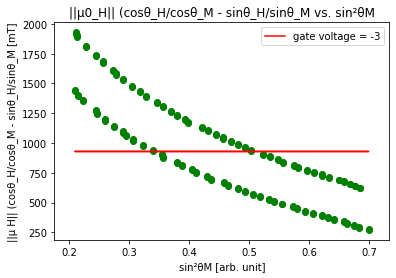

In [183]:
# -*- coding: utf-8 -*-
import os 
import numpy as np
import matplotlib.pyplot as plt
import glob
from tkinter import filedialog as fd
import time
import datetime
from scipy.signal import find_peaks
import math 
from sklearn.linear_model import LinearRegression

###############################################################################
########## Code Body ##########################################################
###############################################################################
    
    
workingPath = fd.askdirectory()
os.chdir(workingPath)

if os.path.isfile("SynthesisFile.txt"):
    os.remove("SynthesisFile.txt")
    
for fileName in sorted(glob.glob("*.IP")):
    st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')  
                 
    #Read the CSV that contains all the data
    currentFile = open(fileName,'r')
    fileLines = currentFile.readlines() 
    fileNameOut = fileName.rstrip(".txt")
    currentFile.close()
    print(st)
    print("Processing: " + fileNameOut)
        
    Field = np.array([])
    hallVolt = np.array([])
    gate_voltage = np.array([])
    theta_M = np.array([])
    sin_theta = np.array([])
    cos_theta = np.array([])
    channel_voltage = np.array([])
    voltage_Counter = 1
    fit = np.array([])
    v_hall = np.array([])

    for lineIndex in range(len(fileLines)):
        currentLine = fileLines[lineIndex]
        dataSegment = currentLine.split()
        Field = np.append(Field, float(dataSegment[9])) #This is milli Tesla
        hallVolt = np.append(hallVolt, float(dataSegment[5])) #This is milli Volt
        channel_voltage = np.append(channel_voltage, float(dataSegment[2])) #This is Volt
        VG = float(dataSegment[6]) - float(dataSegment[2])/2
        gate_voltage = np.append(gate_voltage, np.round(VG, 2)) #This is Volt
        if lineIndex > 1 and VG != gate_voltage[lineIndex-1]:
            voltage_Counter = voltage_Counter + 1
    HV = hallVolt-((max(hallVolt))+min(hallVolt))/2
    array = np.column_stack([Field, HV, gate_voltage])
    hv_new = []
    Fld_new = []
    
    for Fld,hv,gv in array:
        if gv == -3: # change specific gate_voltage value
            hv_new.append(hv)
            Fld_new.append(Fld)
    hv_nw = np.array(hv_new)
    Field_new = np.array(Fld_new)
    HVN = hv_nw/((max(hv_nw)-min(hv_nw))/2)
#    array1 = np.column_stack([Field_new, HVN])

    for index in range(len(HVN)):
        if HVN[index] < 0:
            try:
                theta_M = np.append(theta_M, math.acos(HVN[index])-np.pi)
            except:
                ValueError
            else:
                theta_M = np.append(theta_M, math.acos(HVN[index]))

    for angle in range(len(theta_M)):
        sin_theta = np.append(sin_theta, math.sin(theta_M[angle]))
        cos_theta = np.append(cos_theta, math.cos(theta_M[angle]))

#     #From here on issues in code
    part2 = ((math.cos(86*np.pi/180)/cos_theta) - (math.sin(86*np.pi/180)/sin_theta))
    x = sin_theta ** 2
    RHS = abs(Field_new * part2[:801])
    xFit = np.array([])
    RHSFit = np.array([])

    for index in range(len(x)):
        if x[index] > 0.2 and x[index] < 0.7:
            xFit = np.append(xFit, x[index])
            RHSFit = np.append(RHSFit, RHS[index])

    model = LinearRegression().fit(xFit.reshape(-1,1), RHSFit)
    regression_line = xFit*model.coef_ + model.intercept_

    m = (((np.mean(xFit) * np.mean(RHSFit)) - np.mean(xFit*RHSFit)) / (np.mean(xFit)**2 -np.mean(xFit*RHSFit)))
    b = np.mean(RHSFit) - m*np.mean(xFit)
    regression_line = xFit*m + b
    plt.figure(1)
    plt.scatter(xFit, RHSFit, c = 'green')
    plt.plot(xFit, regression_line, c = 'r')
    figureName = '04. RHS vs LHS.png'
    plt.title("||µ0_H|| (cos\u03B8_H/cos\u03B8_M - sin\u03B8_H/sin\u03B8_M vs. sin²\u03B8M")
    plt.xlabel("sin²\u03B8M [arb. unit]")
    plt.ylabel("||\u03BC H|| (cos\u03B8_H/cos\u03B8_M - sin\u03B8_H/sin\u03B8_M [mT]")
    plt.savefig(os.path.join(workingPath, figureName), dpi = 200, format = 'png')
    plt.legend(['gate voltage = -3']) # change gate voltage value
    plt.show()
    plt.close(1)


In [184]:
array

array([[1026.604533  ,   10.81580084,   -0.        ],
       [1023.559332  ,   10.81354549,    0.        ],
       [1020.266414  ,   10.91276385,    0.        ],
       ...,
       [1013.069391  ,   10.8738486 ,   -0.        ],
       [1017.739534  ,   10.88456065,    0.        ],
       [1022.540092  ,   10.8896362 ,   -0.        ]])